Updating weights for sample 0 at epoch 0
Updating weights for sample 1 at epoch 0
Updating weights for sample 2 at epoch 0
Updating weights for sample 3 at epoch 0
Updating weights for sample 4 at epoch 0
Updating weights for sample 5 at epoch 0
Updating weights for sample 6 at epoch 0
Updating weights for sample 7 at epoch 0
Updating weights for sample 8 at epoch 0
Updating weights for sample 9 at epoch 0
Updating weights for sample 10 at epoch 0
Updating weights for sample 11 at epoch 0
Updating weights for sample 12 at epoch 0
Updating weights for sample 13 at epoch 0
Updating weights for sample 14 at epoch 0
Updating weights for sample 16 at epoch 0
Updating weights for sample 17 at epoch 0
Updating weights for sample 19 at epoch 0
Updating weights for sample 20 at epoch 0
Updating weights for sample 21 at epoch 0
Updating weights for sample 22 at epoch 0
Updating weights for sample 23 at epoch 0
Updating weights for sample 24 at epoch 0
Updating weights for sample 25 at epoch 0
Up

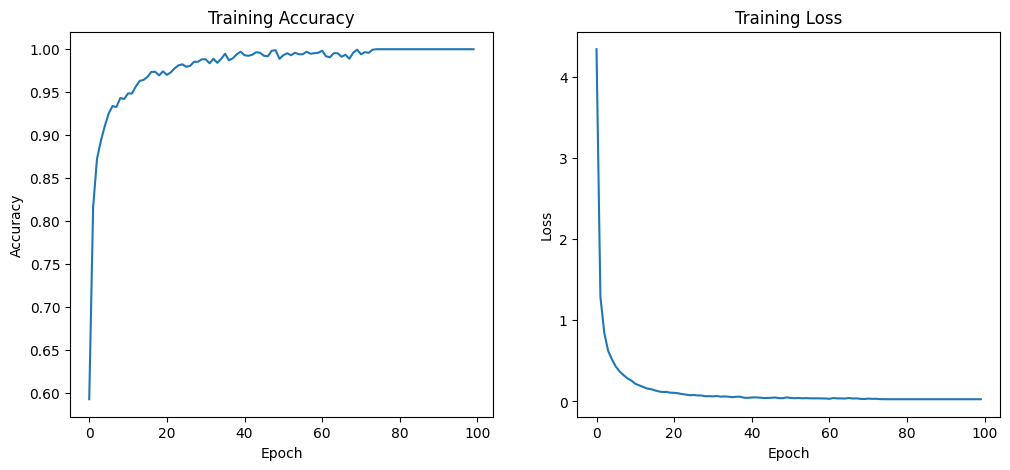

Test Accuracy = 0.83


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the training and test data
train_in = np.loadtxt('train_in.csv', delimiter=',')
train_out = np.loadtxt('train_out.csv', delimiter=',').astype(int)
test_in = np.loadtxt('test_in.csv', delimiter=',')
test_out = np.loadtxt('test_out.csv', delimiter=',').astype(int)

# Add bias to the input (both train and test)
train_in = np.hstack((train_in, np.ones((train_in.shape[0], 1))))
test_in = np.hstack((test_in, np.ones((test_in.shape[0], 1))))

# Initialize weights (257 features including bias, 10 classes)
W = np.random.randn(257, 10)

# Define learning rate and number of epochs
alpha = 0.01
num_epochs = 100

# Softmax function to convert logits to probabilities
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Numerical stability
    return exp_z / exp_z.sum(axis=0)

# Cross-entropy loss
def cross_entropy_loss(probs, y_true):
    m = y_true.shape[0]
    log_likelihood = -np.log(probs[range(m), y_true])
    return np.sum(log_likelihood) / m

# Store accuracy and loss values for plotting
accuracies = []
losses = []

# Perceptron training loop with softmax and cross-entropy
for epoch in range(num_epochs):
    correct = 0
    total_loss = 0

    for i in range(train_in.shape[0]):
        x_i = train_in[i, :]  # Input vector (with bias)
        y_i = train_out[i]    # True label

        # Compute dot product between x_i and weight matrix (logits)
        scores = np.dot(x_i, W)

        # Apply softmax to get probabilities
        probs = softmax(scores)

        # Predict the class with the highest probability
        y_pred = np.argmax(probs)

        # Update weights if prediction is incorrect
        if y_pred != y_i:
            print(f"Updating weights for sample {i} at epoch {epoch}")  # Debugging print statement
            W[:, y_i] += alpha * x_i  # Update correct class
            W[:, y_pred] -= alpha * x_i  # Update incorrect class
        else:
            correct += 1

        # Calculate cross-entropy loss for the current sample
        total_loss += -np.log(probs[y_i])

    # Calculate accuracy for this epoch
    accuracy = correct / train_in.shape[0]
    accuracies.append(accuracy)
    losses.append(total_loss / train_in.shape[0])

    # Print results for the current epoch
    print(f'Epoch {epoch}: Accuracy = {accuracy:.2f}, Loss = {total_loss:.4f}')

# Plot accuracy and loss over time
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(accuracies)
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

# Testing the model on the test set
correct = 0
for i in range(test_in.shape[0]):
    x_i = test_in[i, :]  # Input vector (with bias)
    y_i = test_out[i]    # True label

    # Compute dot product between x_i and weight matrix
    scores = np.dot(x_i, W)

    # Apply softmax
    probs = softmax(scores)

    # Predict the class with the highest probability
    y_pred = np.argmax(probs)

    if y_pred == y_i:
        correct += 1

# Calculate accuracy on the test set
test_accuracy = correct / test_in.shape[0]
print(f'Test Accuracy = {test_accuracy:.2f}')
